In [1]:
#we remove symbols and punctuation, tokenize the text into words, and eliminate common stop words.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Load the training data
my_data = pd.read_csv("train.csv" ,encoding="utf-8")

In [4]:
my_data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


### some EDA

In [5]:
my_data.shape

(20972, 9)

In [6]:
my_data.info() # all float except the "species" - obj.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [7]:
my_data.columns[3:]

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

Computer Science
0    12378
1     8594
Name: count, dtype: int64
Physics
0    14959
1     6013
Name: count, dtype: int64
Mathematics
0    15354
1     5618
Name: count, dtype: int64
Statistics
0    15766
1     5206
Name: count, dtype: int64
Quantitative Biology
0    20385
1      587
Name: count, dtype: int64
Quantitative Finance
0    20723
1      249
Name: count, dtype: int64


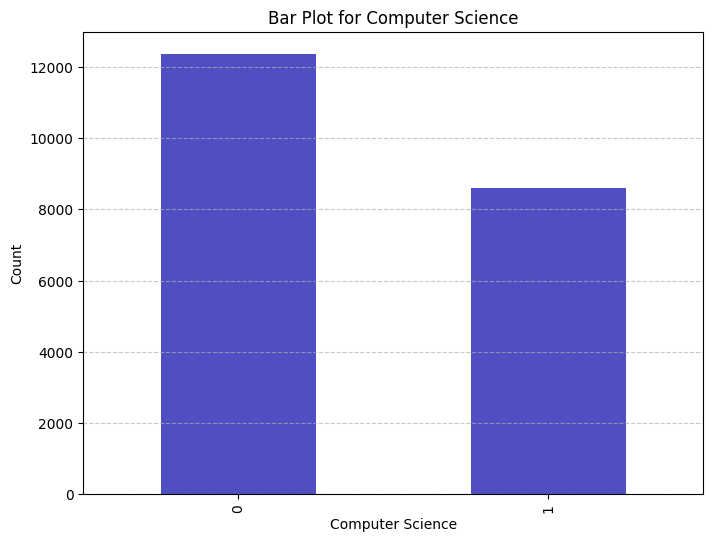

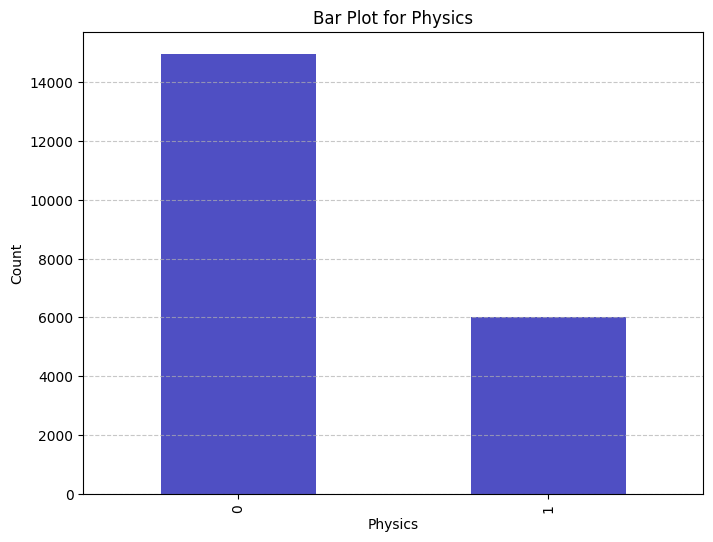

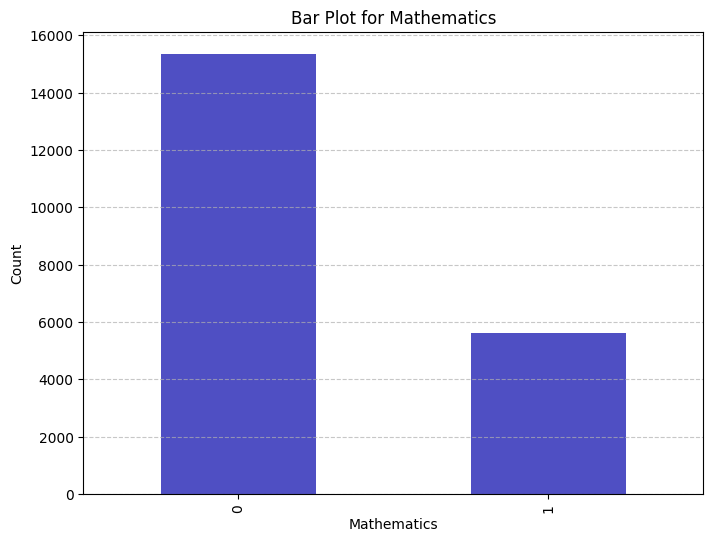

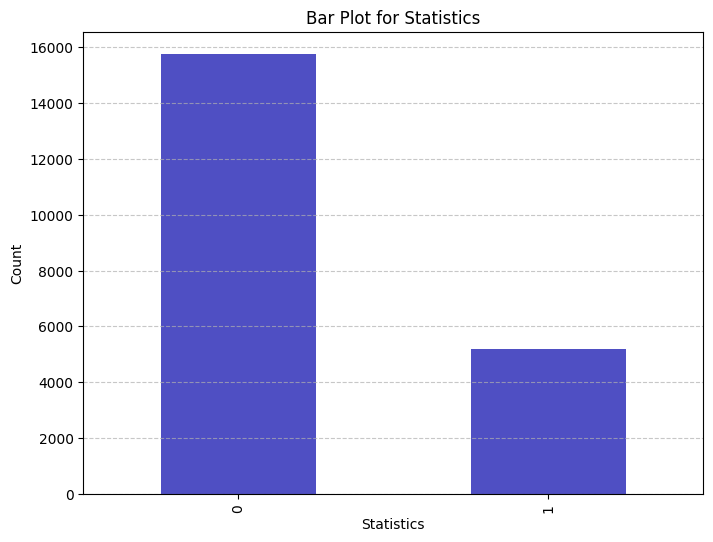

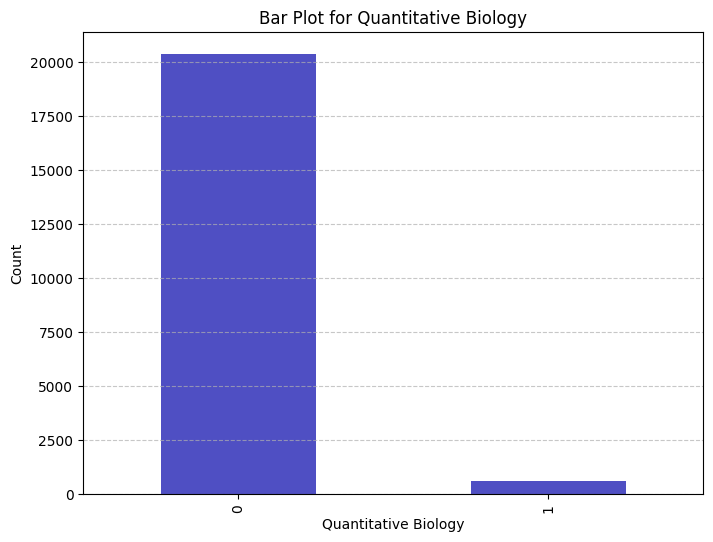

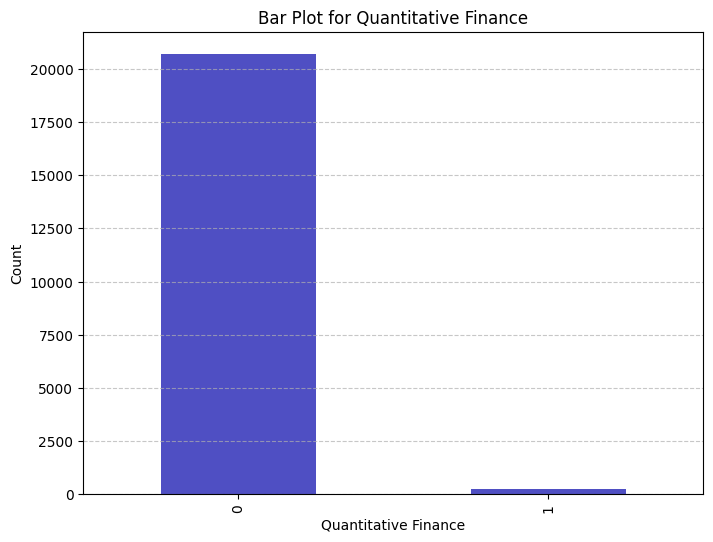

In [8]:
for i in my_data.columns[3:]:
    target_temp = my_data[i].value_counts()
    print(target_temp)


# Plot histograms for each relevant column
for column in my_data.columns[3:]:
    plt.figure(figsize=(8, 6))
    my_data[column].value_counts().sort_index().plot(kind='bar', color='#0504aa', alpha=0.7)
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [9]:
# List of columns to consider
columns_to_merge = ['Quantitative Biology', 'Quantitative Finance']
my_data['other'] = my_data.apply(lambda row: 1 if any(row[column] == 1 for column in columns_to_merge) else 0, axis=1)

In [10]:
my_data

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,other
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,0


In [11]:
my_data.drop('Quantitative Biology',  axis=1, inplace=True)

In [12]:
my_data.drop('Quantitative Finance', axis=1, inplace=True)

In [13]:
# Combine all textual data into a single column
my_data['total_text'] = my_data['TITLE'] + my_data['ABSTRACT']

In [14]:
my_data.set_index('ID', inplace = True)
my_data.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,other,total_text
ID,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,Rotation Invariance Neural Network Rotation i...
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,Spherical polyharmonics and Poisson kernels fo...
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,A finite element approximation for the stochas...
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,Comparative study of Discrete Wavelet Transfor...


In [15]:
my_data = my_data[['total_text', 'Computer Science', 'Physics', 'Mathematics', 'Statistics','other']]

In [16]:
# Clean the textual column
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
stop = stopwords.words('english')

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#performing the following steps: converting to lower case ,removing special charachters ,numbers,and stopwords.
#perfoming tokanization, lemmetization, then Rejoining Tokens:
import re

def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_tokenize(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_lemmatizer(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join(x))
    return df

In [18]:
nltk.download('punkt')
nltk.download
nltk.download('wordnet')
#passing the total_text colom and returining it to  total_text_clean
clean_df = clean_text(my_data, 'total_text', 'total_text_clean')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\fatem\AppData\Local\Temp\ipykernel_2076\724422327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_text_field_name] = df[text_field].str.lower()
C:\Users\fatem\AppData\Local\Temp\ipykernel_2076\724422327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [19]:
final_df = clean_df[['total_text_clean', 'Computer Science', 'Physics', 'Mathematics', 'Statistics', 'other']]
final_df.head()

,total_text_clean,Computer Science,Physics,Mathematics,Statistics,other
ID,,,,,,
1,reconstructing subjectspecific effect map pred...,1,0,0,0,0
2,rotation invariance neural network rotation in...,1,0,0,0,0
3,spherical polyharmonics poisson kernel polyhar...,0,0,1,0,0
4,finite element approximation stochastic maxwel...,0,0,1,0,0
5,comparative study discrete wavelet transforms ...,1,0,0,1,0


 (MultiOutputClassifier) is used with a RandomForestClassifier as the base estimator.
 <br> This approach treats each label as a separate binary classification problem.

#TF-IDF

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = final_df['total_text_clean'] # data (text)
y = final_df.iloc[:, 1:]  # Assuming labels start from column 1 # starting from CS- QF. (labelling)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english',use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

#Word2Vec

In [21]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# Assuming 'final_df' is your DataFrame with the mentioned structure
X = final_df['total_text_clean']  # Text data
y = final_df.iloc[:, 1:]  # Assuming labels start from column 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Word2Vec on your text data
sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to obtain the vector representation of a text using Word2Vec
def get_text_vector(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Applying Word2Vec to your training and testing data
X_train_word2vec = np.vstack([get_text_vector(text, word2vec_model) for text in X_train])
X_test_word2vec = np.vstack([get_text_vector(text, word2vec_model) for text in X_test])

Data Frame (X_test)

In [22]:
X_test_df = pd.DataFrame(X_test)

In [23]:
X_test_df

,total_text_clean
ID,
20258,dynamic layer normalization adaptive neural ac...
483,susceptibility propagation using diagonal cons...
4190,robot routing problem collecting aggregate sto...
9839,probability statistic planet earth geotemporal...
16592,counting number metastable state modularity la...
...,...
14741,mulog apply gaussian denoisers multichannel sa...
3756,strong correlation strongly recurrent neuronal...
10685,capacity class polyhedron k borsuk topological...


Data Frame (y_test)

In [24]:
y_test = pd.DataFrame(y_test)

In [25]:
y_test

,Computer Science,Physics,Mathematics,Statistics,other
ID,,,,,
20258,1,0,0,0,0
483,0,0,1,1,0
4190,1,0,1,0,0
9839,0,1,0,1,0
16592,1,0,0,0,0
...,...,...,...,...,...
14741,0,0,1,1,0
3756,0,0,0,0,1
10685,0,0,1,0,0


Computer Science
0    2503
1    1692
Name: count, dtype: int64
Physics
0    2969
1    1226
Name: count, dtype: int64
Mathematics
0    3045
1    1150
Name: count, dtype: int64
Statistics
0    3126
1    1069
Name: count, dtype: int64
other
0    4029
1     166
Name: count, dtype: int64


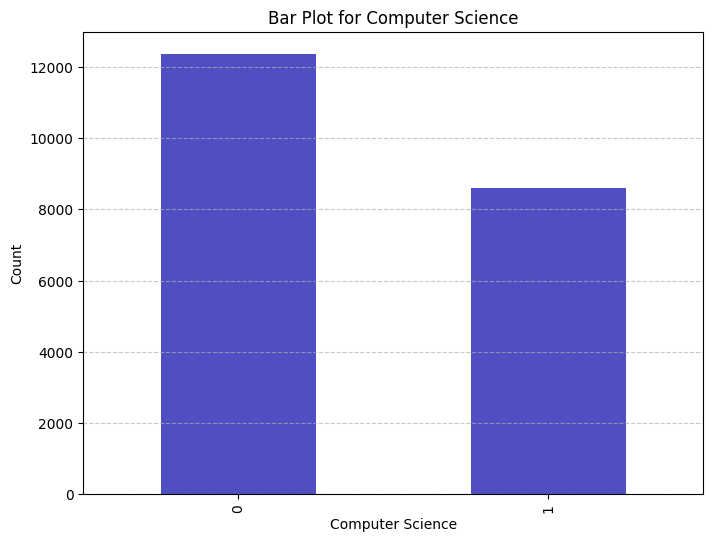

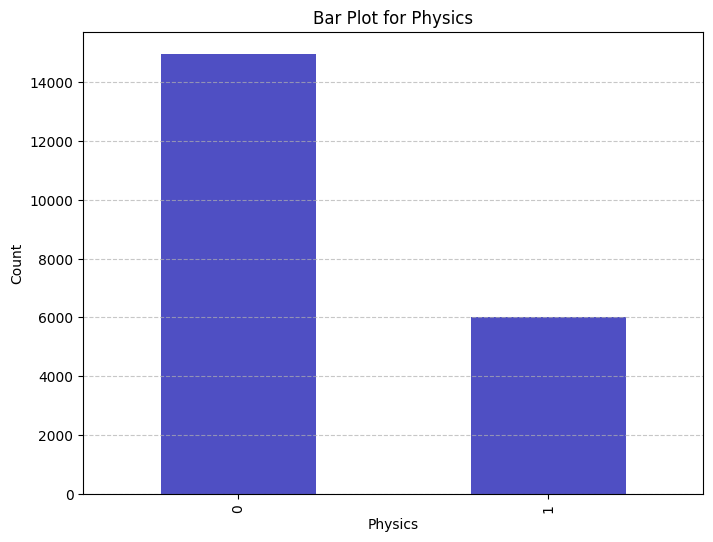

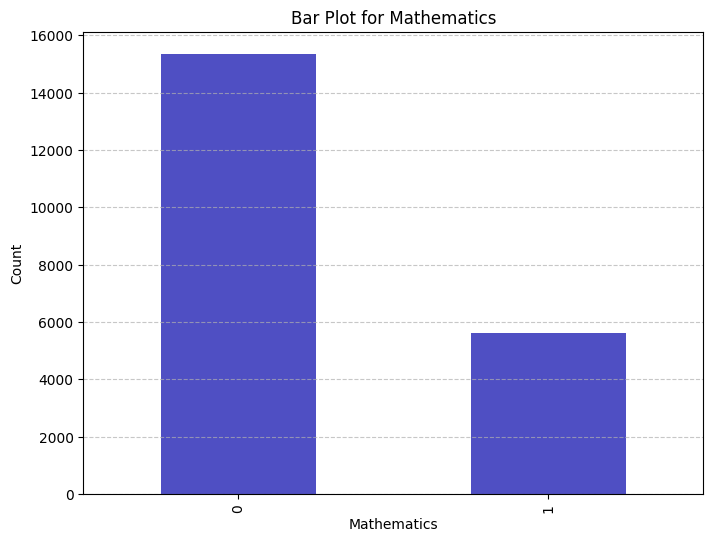

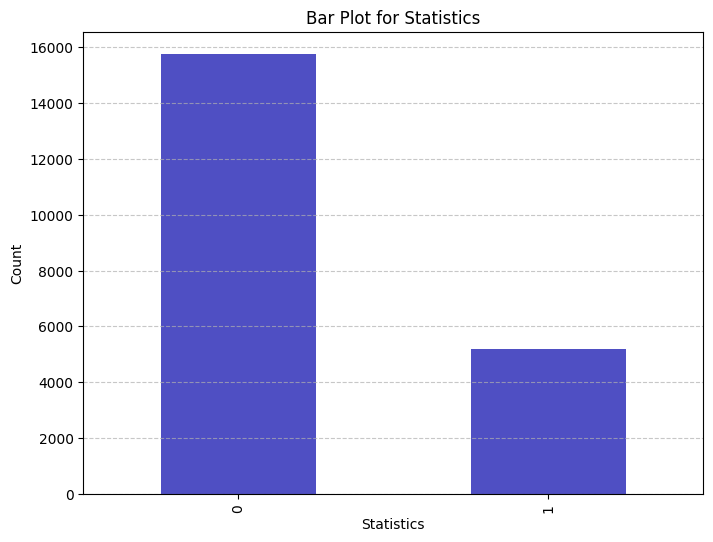

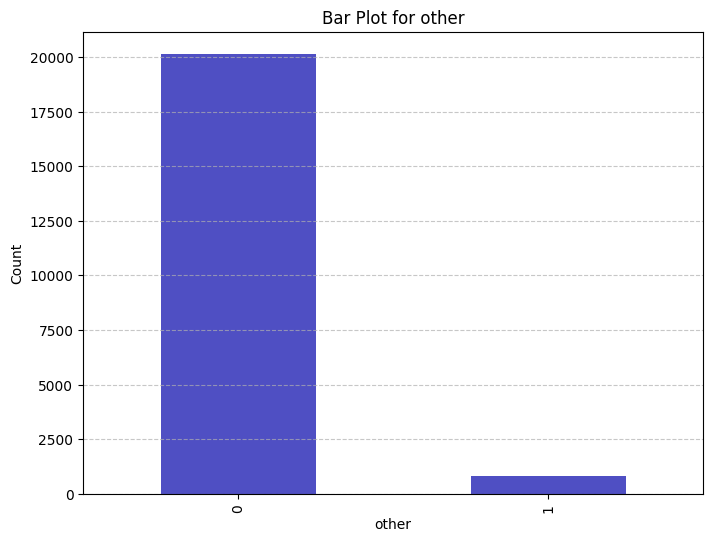

In [26]:
for i in y_test.columns[:]:
    target_temp = y_test[i].value_counts()
    print(target_temp)


# Plot histograms for each relevant column
for column in y_test.columns[:]:
    plt.figure(figsize=(8, 6))
    my_data[column].value_counts().sort_index().plot(kind='bar', color='#0504aa', alpha=0.7)
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# RandomForest Classifier

In [27]:
# Initialize MultiOutputClassifier with RandomForestClassifier as the base estimator
multi_rf_classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search_rf_tfidf = GridSearchCV(estimator=multi_rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf_word2vec = GridSearchCV(estimator=multi_rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')



### RF: TF-IDF

In [28]:
# Train the model using grid search
grid_search_rf_tfidf.fit(X_train_vectors_tfidf, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_rf_tfidf.best_params_)

# Evaluate the training score
training_score = grid_search_rf_tfidf.score(X_train_vectors_tfidf, y_train)
print("Training Score: ", training_score)


Best Parameters:  {'estimator__max_depth': None, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
Training Score:  0.9929069559516004


In [29]:
# Make predictions on the test set
y_pred_rf_tfidf = grid_search_rf_tfidf.predict(X_test_vectors_tfidf)

In [30]:
# Evaluate the performance using classification report
print("Classification Report :")
print(classification_report(y_test, y_pred_rf_tfidf))

Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1692
           1       0.91      0.78      0.84      1226
           2       0.86      0.68      0.76      1150
           3       0.79      0.69      0.74      1069
           4       0.71      0.03      0.06       166

   micro avg       0.83      0.74      0.78      5303
   macro avg       0.81      0.61      0.64      5303
weighted avg       0.83      0.74      0.77      5303
 samples avg       0.78      0.77      0.76      5303



c:\Users\fatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from joblib import dump

model_path = 'RandomForest_TFIDF.joblib'  # Specify the file name as "RandomForest_TFIDF.joblib"
dump(grid_search_rf_tfidf, model_path)

['RandomForest_TFIDF.joblib']

### RF: Word2Vec

In [33]:
# Train the model on the Word2Vec vectors
grid_search_rf_word2vec.fit(X_train_word2vec, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_rf_word2vec.best_params_)

# Evaluate the training score
training_score = grid_search_rf_word2vec.score(X_train_word2vec, y_train)
print("Training Score: ", training_score)


Best Parameters:  {'estimator__max_depth': 20, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}
Training Score:  0.9182213745008047


In [34]:
# Make predictions on the Word2Vec vectors
y_pred_rf_word2vec = grid_search_rf_word2vec.predict(X_test_word2vec)

In [35]:
grid_search_rf_word2vec.score(X_train_word2vec, y_train) # - training Score 100

0.9182213745008047

In [36]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_word2vec))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1692
           1       0.91      0.79      0.84      1226
           2       0.82      0.76      0.79      1150
           3       0.76      0.72      0.74      1069
           4       0.50      0.01      0.01       166

   micro avg       0.81      0.76      0.78      5303
   macro avg       0.75      0.62      0.64      5303
weighted avg       0.80      0.76      0.77      5303
 samples avg       0.80      0.79      0.78      5303



c:\Users\fatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from joblib import dump

model_path = 'RandomForest_Word2Vec.joblib'  # Specify the file name as "sara.joblib"
dump(grid_search_rf_word2vec, model_path)

['RandomForest_Word2Vec.joblib']

# Logistic Regression Classifier

In [38]:
# Initialize MultiOutputClassifier with LogisticRegression as the base estimator
multi_lr_classifier = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=42))

# Define the parameter grid for the LogisticRegression
param_grid_lr = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(estimator=multi_lr_classifier, param_grid=param_grid_lr, cv=5, scoring='accuracy')


### LR: TF-IDF

In [39]:
# Train the model using grid search
grid_search_lr.fit(X_train_vectors_tfidf, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_lr.best_params_)

# Evaluate the training score
training_score_lr = grid_search_lr.score(X_train_vectors_tfidf, y_train)
print("Training Score: ", training_score_lr)

Best Parameters:  {'estimator__C': 1, 'estimator__max_iter': 100, 'estimator__penalty': 'l2'}
Training Score:  0.659891518149848


In [40]:
# Make predictions on the test set
y_pred_lr_tfidf = grid_search_lr.predict(X_test_vectors_tfidf)

In [41]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_tfidf))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1692
           1       0.90      0.79      0.84      1226
           2       0.84      0.73      0.78      1150
           3       0.81      0.67      0.73      1069
           4       0.79      0.13      0.23       166

   micro avg       0.84      0.74      0.78      5303
   macro avg       0.83      0.62      0.68      5303
weighted avg       0.84      0.74      0.78      5303
 samples avg       0.79      0.77      0.76      5303



c:\Users\fatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from joblib import dump

model_path = 'LogisticRegression_TFIDF.joblib'  # Specify the file name as "LogisticRegression_TFIDF.joblib"
dump(grid_search_rf_word2vec, model_path)

['LogisticRegression_TFIDF.joblib']

### LR: Word2Vec

In [43]:
# Train the model
grid_search_lr.fit(X_train_word2vec, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_lr.best_params_)

# Evaluate the training score
training_score = grid_search_lr.score(X_train_word2vec, y_train)
print("Training Score: ", training_score)

Best Parameters:  {'estimator__C': 10, 'estimator__max_iter': 100, 'estimator__penalty': 'l1'}
Training Score:  0.6282410442868213


In [44]:
# Make predictions on the Word2Vec vectors
y_pred_lr_word2vec = grid_search_lr.predict(X_test_word2vec)

In [45]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_word2vec))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1692
           1       0.89      0.82      0.85      1226
           2       0.83      0.75      0.79      1150
           3       0.77      0.70      0.73      1069
           4       0.38      0.02      0.03       166

   micro avg       0.82      0.76      0.78      5303
   macro avg       0.73      0.62      0.64      5303
weighted avg       0.80      0.76      0.77      5303
 samples avg       0.80      0.79      0.78      5303



c:\Users\fatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from joblib import dump

model_path = 'LogisticRegression_Word2Vec.joblib'  # Specify the file name as "LogisticRegression_Word2Vec.joblib"
dump(grid_search_rf_word2vec, model_path)

['LogisticRegression_Word2Vec.joblib']

# Naive Base Classifier

### NB: TF-IDF

In [61]:
# Initialize MultiOutputClassifier with MultinomialNB as the base estimator
multi_nb_classifier = MultiOutputClassifier(MultinomialNB())

# Define the parameter grid for MultinomialNB
param_grid_nb = {
    'estimator__alpha': [0.1, 0.5, 1.0, 2.0],
    'estimator__fit_prior': [True, False],
    'estimator__class_prior': [None, [0.2, 0.8], [0.5, 0.5]],
    # Add other parameters as needed
}

# Create the GridSearchCV object
grid_search_nb_tfidf = GridSearchCV(estimator=multi_nb_classifier, param_grid=param_grid_nb, cv=5, scoring='accuracy')

In [62]:
# Train the model using grid search
grid_search_nb_tfidf.fit(X_train_vectors_tfidf, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_nb_tfidf.best_params_)

# Evaluate the training score
training_score_nb = grid_search_nb_tfidf.score(X_train_vectors_tfidf, y_train)
print("Training Score: ", training_score_nb)

Best Parameters:  {'estimator__alpha': 0.5, 'estimator__class_prior': None, 'estimator__fit_prior': True}
Training Score:  0.6139357453656792


In [63]:
# Make predictions on the test set
y_pred_nb_tfidf = grid_search_nb_tfidf.predict(X_test_vectors_tfidf)

In [64]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred_nb_tfidf))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1692
           1       0.92      0.76      0.83      1226
           2       0.82      0.71      0.76      1150
           3       0.77      0.65      0.71      1069
           4       0.67      0.01      0.02       166

   micro avg       0.82      0.72      0.77      5303
   macro avg       0.79      0.59      0.62      5303
weighted avg       0.82      0.72      0.76      5303
 samples avg       0.76      0.75      0.74      5303



c:\Users\fatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from joblib import dump

model_path = 'NaiveBase_TFIDF.joblib'  # Specify the file name as "NaiveBase_TFIDF.joblib"
dump(grid_search_nb_tfidf, model_path)

['NaiveBase_TFIDF.joblib']

### NB: Word2Vec

In [67]:
from sklearn.naive_bayes import GaussianNB

# Initialize MultiOutputClassifier with MultinomialNB as the base estimator
multi_nb_classifier = MultiOutputClassifier(GaussianNB())

# Define the parameter grid for MultinomialNB
param_grid_nb = {
    'estimator__priors': [None, [0.2, 0.8], [0.5, 0.5]]
}

# Create the GridSearchCV object
grid_search_nb_word2vec = GridSearchCV(estimator=multi_nb_classifier, param_grid=param_grid_nb, cv=5, scoring='accuracy')

In [68]:
# Train the model
grid_search_nb_word2vec.fit(X_train_word2vec, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_nb_word2vec.best_params_)

# Evaluate the training score
training_score_nb = grid_search_nb_word2vec.score(X_train_word2vec, y_train)
print("Training Score: ", training_score_nb)


Best Parameters:  {'estimator__priors': None}
Training Score:  0.36651367944209334


In [69]:
# Make predictions on the Word2Vec vectors
y_pred_word2vec_nb = grid_search_nb_word2vec.predict(X_test_word2vec)

In [70]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred_word2vec_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1692
           1       0.87      0.79      0.83      1226
           2       0.69      0.83      0.76      1150
           3       0.51      0.91      0.65      1069
           4       0.11      0.65      0.19       166

   micro avg       0.60      0.83      0.70      5303
   macro avg       0.58      0.80      0.64      5303
weighted avg       0.68      0.83      0.74      5303
 samples avg       0.67      0.85      0.72      5303



c:\Users\fatem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from joblib import dump

model_path = 'NaiveBase_Word2Vec.joblib'  # Specify the file name as "NaiveBase_Word2Vec.joblib"
dump(grid_search_nb_word2vec, model_path)

['NaiveBase_Word2Vec.joblib']